# Example Use

How to use the main class.

In [6]:
import sys
sys.path.append('..')
from causal_faker import CausalFaker

%matplotlib inline

The idea is to specify a graph of interdependence of variables in the form of a weighted DAG.

Each variable is computed from the variables that feed into it.

If nothing feeds into the node then its value is drawn from a random variable.

A simple example will explain the idea.

In [2]:
edges = {
    (0, 1) : 0.2,
    (0, 2) : 0.4,
    (1, 2) : -0.1
    }

In [4]:
cf = CausalFaker(edges)

Nodes 1 and two are inversely correlated, but a cofounder (node 0) correlates positively with both.

The values of 1 and two are completely determined by the value of node zero.

But the value of node 0 is determined at random.

The model assumes that the relationships are linear, and that the random noise is drawn from N(0,1).

We can draw this simple graph ...

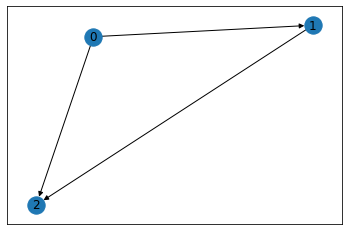

In [8]:
cf.draw()

We can also draw one set of random variables from it ...

In [9]:
cf.get_values()

{0: 0.6152973709687354, 1: 0.12305947419374708, 2: 0.23381300096811944}

Or we can draw n sets of variables from it.

In [10]:
cf.get_n(10)

[{0: 0.3797605391214821, 1: 0.07595210782429643, 2: 0.14430900486616322},
 {0: 0.013149341159427558, 1: 0.0026298682318855117, 2: 0.0049967496405824725},
 {0: 0.2292883148180572, 1: 0.04585766296361144, 2: 0.08712955963086173},
 {0: 0.20342044964308428, 1: 0.04068408992861686, 2: 0.07729977086437202},
 {0: 1.4384853797581973, 1: 0.28769707595163946, 2: 0.546624444308115},
 {0: -0.3581534137857083, 1: -0.07163068275714167, 2: -0.13609829723856917},
 {0: 0.14708750716986255, 1: 0.02941750143397251, 2: 0.055893252724547766},
 {0: 0.3619608616455904, 1: 0.07239217232911808, 2: 0.13754512742532435},
 {0: -1.1237134528014823, 1: -0.22474269056029647, 2: -0.42701111206456327},
 {0: 0.2167296598524765, 1: 0.0433459319704953, 2: 0.08235727074394107}]

We can also pipe this into pandas ...

In [12]:
df = cf.get_df(10)

Observe the correlation between nodes 1 and 2. They are positively correlated, even though I specified a negative correlation, this is because of the counfounding node 0.

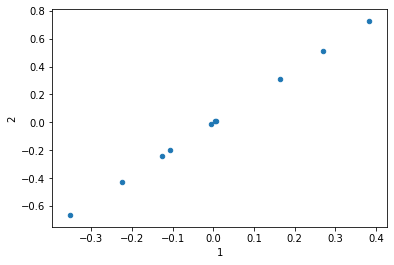

In [13]:
df.plot.scatter(1, 2)

Another example. If we want to add noise to the inputs of nodes 1 and 2 we can do this by specifying two addtional nodes like so>

In [45]:
edges = {
    (0, 1) : 0.2,
    (0, 2) : 0.4,
    (1, 2) : -0.1,
    (3, 1) : .1,
    (4, 2) : .1
    }

cf2 = CausalFaker(edges)

Running the draw function a few times can be useful, to get a better layout...

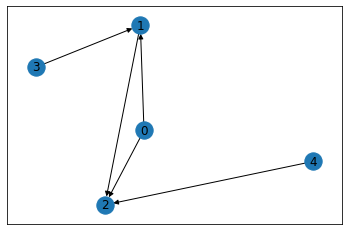

In [29]:
cf2.draw()

Now the correlation should persist, but with some additional noise.

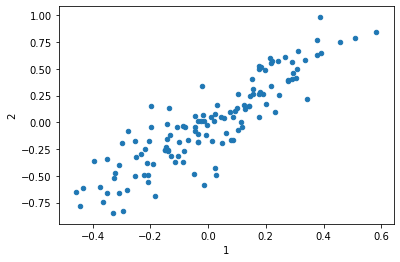

In [46]:
cf2.get_df(128).plot.scatter(1, 2)

That's basically the idea, but more complex causal graphs can be built up in a smilar manner.

### Cycles

Specifying a graph with a cycle raises and error, as this simple example shows.

In [47]:
CausalFaker(
    {
        (0, 1): 1,
        (1, 2): 1,
        (2, 0): 1
    }
)

Maximum level exceeded, which means your graph has cycles


CycleError: 

### Other convinience functions

Currently you specify your graph with a dictionary of edges. The keys are two-tuples, specifying an edge, and the values are the wieght (as we see in the examples above).

However, you can also get back you graph in other forms, such as:

In [49]:
cf.adjaceny_matrix

array([[ 0. ,  0.2,  0.4],
       [ 0. ,  0. , -0.1],
       [ 0. ,  0. ,  0. ]])

In [50]:
cf.scipy_sparse

<3x3 sparse matrix of type '<class 'numpy.float32'>'
	with 3 stored elements in Dictionary Of Keys format>

In [51]:
cf.networkx

That's it for the moment.